**Importing Necessary Libraries**

In [1]:
import os
from matplotlib import pyplot as plt
from deepforest import get_data
from deepforest import deepforest
from deepforest import utilities
from deepforest import preprocess

Using TensorFlow backend.


**Declaring Blank DeepForest Model**

In [2]:
scratch_model = deepforest.deepforest()

Reading config file: H:\Anaconda\envs\deepforest\lib\site-packages\deepforest\data\deepforest_config.yml
A blank deepforest object created. To perform prediction, either train or load an existing model.


*Configuring the Model Parameters*

In [3]:
scratch_model.config["epochs"] = 10
scratch_model.config["snapshot_path"] = "model_snapshots/"
scratch_model.config["save-snapshot"] = True
scratch_model.config

{'batch_size': 1,
 'weights': 'None',
 'backbone': 'resnet50',
 'image-min-side': 800,
 'multi-gpu': 1,
 'epochs': 10,
 'validation_annotations': 'None',
 'freeze_layers': 0,
 'freeze_resnet': False,
 'score_threshold': 0.05,
 'multiprocessing': False,
 'workers': 1,
 'max_queue_size': 10,
 'random_transform': False,
 'save-snapshot': True,
 'save_path': 'snapshots/',
 'snapshot_path': 'model_snapshots/'}

**Loading Annotations File & Training**

In [5]:
annotations_file = "train/train_data.csv"
scratch_model.train(annotations=annotations_file, input_type="fit_generator")

There are 1 unique labels: ['Tree'] 
Training retinanet with the following args ['--backbone', 'resnet50', '--image-min-side', '800', '--multi-gpu', '1', '--epochs', '10', '--steps', '40', '--batch-size', '1', '--tensorboard-dir', 'None', '--workers', '1', '--max-queue-size', '10', '--freeze-layers', '0', '--score-threshold', '0.05', '--save-path', 'snapshots/', '--snapshot-path', 'model_snapshots/', 'csv', 'train/train_data.csv', 'train\\classes.csv']
102948864/102945312 [==============================] - 75s 1us/step
Creating model, this may take a second...

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors
Instructions for updating:
Use tf.where in 2.0, which has the same br


Epoch 1/10
40/40 [==============================] - 555s 14s/step - loss: 3.9534 - regression_loss: 2.8326 - classification_loss: 1.1207

Epoch 00001: saving model to model_snapshots/resnet50_csv_01.h5
Epoch 2/10
40/40 [==============================] - 520s 13s/step - loss: 3.5274 - regression_loss: 2.5791 - classification_loss: 0.9483

Epoch 00002: saving model to model_snapshots/resnet50_csv_02.h5
Epoch 3/10
40/40 [==============================] - 526s 13s/step - loss: 3.0864 - regression_loss: 2.4850 - classification_loss: 0.6014

Epoch 00003: saving model to model_snapshots/resnet50_csv_03.h5
Epoch 4/10
40/40 [==============================] - 523s 13s/step - loss: 2.9848 - regression_loss: 2.4658 - classification_loss: 0.5191

Epoch 00004: saving model to model_snapshots/resnet50_csv_04.h5
Epoch 5/10
40/40 [==============================] - 518s 13s/step - loss: 2.9104 - regression_loss: 2.4379 - classification_loss: 0.4724

Epoch 00005: saving model to model_snapshots/resnet50

**Evaluate the Mean Average Precision**

In [7]:
mAP = scratch_model.evaluate_generator(annotations=annotations_file)
print("Mean Average Precision is: {:.3f}".format(mAP))

Running network: N/A% (0 of 40) |        | Elapsed Time: 0:00:00 ETA:  --:--:--

There are 1 unique labels: ['Tree'] 


Running network: 100% (40 of 40) |#######| Elapsed Time: 0:01:58 Time:  0:01:58
Parsing annotations: 100% (40 of 40) |###| Elapsed Time: 0:00:00 Time:  0:00:00


774 instances of class Tree with average precision: 0.2743
mAP using the weighted average of precisions among classes: 0.2743
mAP: 0.2743
Mean Average Precision is: 0.274


**Saving the Scratch Model**

In [8]:
scratch_model.model.save("ScratchModel_10_Epoch.h5")

**Plotting the Train Curves**

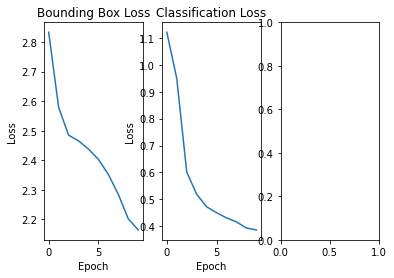

In [13]:
scratch_model.plot_curves()

**Predicting a Sample Image from Dataset**

*Predict the Annotations of Trees*

In [19]:
predict_image = "SampleImage.png"
image_annotation = scratch_model.predict_image(image_path=predict_image, show=False, return_plot = False)
image_annotation.head()

,xmin,ymin,xmax,ymax,score,label
0,299.677734,342.376190,352.000580,396.255676,0.546429,Tree
1,340.329376,0.000000,391.023560,50.962479,0.530102,Tree
2,0.532228,222.057175,40.309387,265.976654,0.491707,Tree
3,153.568726,340.736603,209.394363,397.845856,0.463621,Tree
4,354.443268,73.270691,396.857483,121.480431,0.435943,Tree


*Display the Predicted Image With Bounding Boxes*

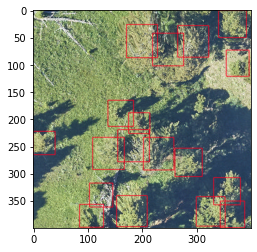

In [20]:
image = scratch_model.predict_image(image_path=predict_image,return_plot = True)

plt.imshow(image[...,::-1])
plt.show()